# Pandas

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
http://pandas.pydata.org/

Parts of this tutorial are based on: https://github.com/yhat/DataGotham2013/

## Install Pandas
* Pandas is part of many python distributions for scientific computing such as Anaconda 
* But you can also install it manually e.g. using pip: pip install pandas

## Outline
In the following tutorial we will 
- (1) learn how to import and access data with pandas, 
- (2) how to aggregate and modify data and 
- (3) how to statistically analyze data.


# (1) Import and Access Data



## Reading from a file


You can define the separator (sep=';'), the encoding (e.g., encoding='latin1'), which column is a Date field and needs to be parsed like a date (parse_dates=['Date']), which column is the index (e.g., index_col='Date'), if the file has a header (e.g., header=False means no header while header=0 means that the row 0 is the header row!!!)


In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import re

We're going to use the <code>read_csv</code> function in pandas

In [4]:
?pd.read_csv

You can pass commands to the terminal using !

In [5]:
! head -n 2 ./data/credit-training.csv

Der Befehl "head" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [6]:
df = pd.read_csv("./data/credit-training.csv")

## What is <code>df</code>?
Our data is represented by a DataFrame. You can think of data frames as a giant spreadsheet which you can program. It's a collection of series (or columns) with a common set of commands that make managing data in Python super easy.

In [7]:
# show dataframe
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
5,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
7,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


In [8]:
#you'll learn more about head() later
df.head(n=3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0


In [9]:
type(df)

pandas.core.frame.DataFrame

You can think of a Series is a column in your data. A series will have a particular datatype associated with it. Datatypes can be integers, strings, floating point numbers, etc.

In [10]:
df.SeriousDlqin2yrs.head()
type(df.SeriousDlqin2yrs)

pandas.core.series.Series

In [11]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## Basic Comands
Many of these commands will be familiar for those of you coming from a UNIX/Linux background. 

### Selecting a column

In [12]:
df['DebtRatio']
df.DebtRatio

0            0.802982
1            0.121876
2            0.085113
3            0.036050
4            0.024926
5            0.375607
6         5710.000000
7            0.209940
8           46.000000
9            0.606291
10           0.309476
11           0.531529
12           0.298354
13           0.382965
14         477.000000
15           0.209892
16        2058.000000
17           0.188274
18           0.527888
19           0.065868
20           0.430046
21           0.475841
22           0.241104
23           0.085512
24           0.241622
25           1.595253
26           0.097672
27           0.042383
28           0.011761
29           0.436103
             ...     
149970       0.253855
149971       0.013997
149972       0.008638
149973       0.494819
149974       0.603479
149975    2716.000000
149976      60.000000
149977     349.000000
149978       0.259496
149979       0.057235
149980       0.254976
149981       0.121752
149982       0.250272
149983       0.000800
149984    

### head(n=5)

In [13]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [14]:
df.head(1)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2


In [15]:
df.SeriousDlqin2yrs.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

### tail(n=5)

In [16]:
df.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100,4,0,1,0,0
149996,0,0.299745,44,0,0.716562,5584,4,0,1,0,2
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0
149998,0,0.000000,30,0,0.000000,5716,4,0,0,0,0
149999,0,0.850283,64,0,0.249908,8158,8,0,2,0,0


In [17]:
df.RevolvingUtilizationOfUnsecuredLines.tail()

149995    0.040674
149996    0.299745
149997    0.246044
149998    0.000000
149999    0.850283
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

### unqiue() and nunique()

In [18]:
df.NumberOfDependents.unique()

array([  2.,   1.,   0.,  nan,   3.,   4.,   5.,   6.,   8.,   7.,  20.,
        10.,   9.,  13.])

In [19]:
df.NumberOfDependents.nunique()

print (len(df.NumberOfDependents.unique()))

14


### pd.value_counts(values_to_count)
Computes a frequency table of one factor (e.g., NumberOfDependents) --> how often do we observe that the number of dependents is zero? 90826 times.

In [20]:
pd.value_counts(df.NumberOfDependents)
df.NumberOfDependents.value_counts()

0     86902
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: NumberOfDependents, dtype: int64

In [21]:
pd.value_counts(df.NumberOfDependents, ascending=True)

13        1
20        1
9         5
10        5
8        24
7        51
6       158
5       746
4      2862
3      9483
2     19522
1     26316
0     86902
Name: NumberOfDependents, dtype: int64

In [22]:
pd.value_counts(df.NumberOfDependents, sort=True)

0     86902
1     26316
2     19522
3      9483
4      2862
5       746
6       158
7        51
8        24
10        5
9         5
20        1
13        1
Name: NumberOfDependents, dtype: int64

In [23]:
#chain value_counts together with head() to give you the top 3
pd.value_counts(df.NumberOfDependents).head(3)

0    86902
1    26316
2    19522
Name: NumberOfDependents, dtype: int64

Populating the interactive namespace from numpy and matplotlib


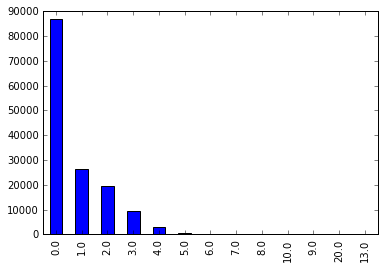

In [24]:
%pylab inline
pd.value_counts(df.NumberOfDependents).plot(kind='bar')

## pd.crosstab(rows, cols)
Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

Use `pd.crosstab` to make a table that contains customer's ages in the lefthand column and the number of dependents they have in the right

In [25]:
print (df.age.nunique())
print (df.NumberOfDependents.nunique())
#86x13 table


pd.crosstab(df.age, df.NumberOfDependents)

86
13


NumberOfDependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,20.0
age,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0
21,148,3,1,0,0,0,0,0,0,0,0,0,0
22,385,7,2,2,0,0,0,0,0,0,0,0,0
23,550,33,13,3,0,0,0,0,0,0,0,0,0
24,689,48,19,3,1,0,0,0,0,0,0,0,0
25,774,91,31,7,5,1,0,0,0,0,0,0,0
26,946,128,56,14,4,0,0,0,0,0,0,0,0
27,1001,192,53,32,4,0,0,0,0,0,0,0,0
28,1142,210,114,45,8,1,0,0,0,0,0,0,0


## Slicing and Indexing Data
pandas (like R) uses a system of boolean indexing. 

### Grabbing columns

In [26]:
df['MonthlyIncome'].head()
df.MonthlyIncome.head()

0     9120
1     2600
2     3042
3     3300
4    63588
Name: MonthlyIncome, dtype: float64

In [27]:
df[['MonthlyIncome', 'SeriousDlqin2yrs']].head()

,MonthlyIncome,SeriousDlqin2yrs
0,9120,1
1,2600,0
2,3042,0
3,3300,0
4,63588,0


In [28]:
columns_i_want = ['MonthlyIncome', 'SeriousDlqin2yrs']
df[columns_i_want].head()

,MonthlyIncome,SeriousDlqin2yrs
0,9120,1
1,2600,0
2,3042,0
3,3300,0
4,63588,0


### Adding Columns

In [29]:
df.newcolumn = 1
# this will throw an error
#df['newcolumn']

In [30]:
df['one'] = 1
df.one.head()

0    1
1    1
2    1
3    1
4    1
Name: one, dtype: int64

### Removing a column

In [31]:
del df['one']

### Boolean Indexing

In [32]:

df.MonthlyIncome > 5000

0          True
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9          True
10        False
11         True
12         True
13         True
14        False
15         True
16        False
17         True
18        False
19        False
20         True
21        False
22        False
23         True
24        False
25        False
26         True
27        False
28        False
29         True
          ...  
149970     True
149971    False
149972     True
149973     True
149974    False
149975    False
149976    False
149977    False
149978    False
149979     True
149980     True
149981     True
149982    False
149983    False
149984    False
149985    False
149986    False
149987    False
149988     True
149989     True
149990    False
149991     True
149992    False
149993    False
149994    False
149995    False
149996     True
149997    False
149998     True
149999     True
Name: MonthlyIncome, dty

In [33]:
gt_5k = df[df.MonthlyIncome > 5000]
print (len(gt_5k),"people with MonthlyIncome > 5000")
df[df.MonthlyIncome > 5000].head()

64410 people with MonthlyIncome > 5000


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
9,0,0.189169,57,0,0.606291,23684,9,0,4,0,2
11,0,0.018798,51,0,0.531529,6501,7,0,2,0,2
12,0,0.010352,46,0,0.298354,12454,13,0,2,0,2


In [34]:
df.ix[40:45, 0:2]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines
40,0,0.719985
41,0,0.072898
42,0,0.469057
43,0,0.718705
44,0,0.368876
45,0,0.000603


In [35]:
mask = (df.MonthlyIncome > 5000) & (df.SeriousDlqin2yrs==1)
df[mask].head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
13,1,0.964673,40,3,0.382965,13700,9,3,1,1,2
74,1,0.133063,49,1,0.182882,10257,9,0,2,0,3
162,1,1.046279,47,1,1.104301,5416,6,0,2,0,1
184,1,0.085338,51,0,0.477504,6200,11,0,1,0,0


### Write some code that filters to the following:

- people 35 or older
- who have not been delinquent in the past 2 years
- who have less than 10 open credit lines/loans

In [36]:
mask = (df.age >= 35) & (df.SeriousDlqin2yrs==0) & (df.NumberOfOpenCreditLinesAndLoans < 10)
len(df[mask])==76151

True

## Handling Missing Values
One of the most frustrating parts of data science can be handling null or missing data. pandas has a lot of built in features for making is super easy to handle missing data. The first thing we need to do is determine which fields have missing data.

### Filling NA's

In [37]:
s = pd.Series([1, 2, None, 4])
s

0     1
1     2
2   NaN
3     4
dtype: float64

In [38]:
s.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [39]:
#replace NaN with -1
s.fillna(-1)

0    1
1    2
2   -1
3    4
dtype: float64

In [40]:
s.fillna(s.mean())

0    1.000000
1    2.000000
2    2.333333
3    4.000000
dtype: float64

In [41]:
s.to_csv("./data/test.csv", index=False)


# (2) Modifying Data

### Read-in Data

In [42]:
import pandas as pd
import numpy as np
import pylab as pl

In [43]:
df = pd.read_csv("./data/credit-training.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


## Apply
"Applies" or operates on a column in your data frame with a given function. This is analagous to an Excel formula.

In [44]:
df.MonthlyIncome.apply(np.log)

0          9.118225
1          7.863267
2          8.020270
3          8.101678
4         11.060180
5          8.160518
6               NaN
7          8.160518
8               NaN
9         10.072555
10         7.824046
11         8.779711
12         9.429797
13         9.525151
14             -inf
15         9.338030
16              NaN
17         9.082507
18         8.095599
19         5.808142
20         9.417355
21         8.006368
22         7.824046
23         8.976641
24         7.789869
25         8.450198
26         9.027979
27         7.824046
28         8.131531
29         8.612503
            ...    
149970     9.648595
149971     8.517193
149972     8.845777
149973     8.612503
149974     8.517193
149975          NaN
149976          NaN
149977          NaN
149978     7.824046
149979     9.071078
149980     8.617039
149981     8.831858
149982     7.922986
149983     8.517193
149984          NaN
149985     7.575585
149986     8.517193
149987     8.086103
149988     8.924656


### Applying with lambda functions
A `lambda` function is an anonymous function. Think of it just as a shorthand way to define a quick function that you need once.

In [45]:
add_10 = lambda x: x + 10
plus = lambda x, y: x + y

print (add_10(9))
print (plus(10, 20))

19
30


In [46]:
df.MonthlyIncome.apply(lambda x: np.log(x + 1))

0          9.118335
1          7.863651
2          8.020599
3          8.101981
4         11.060196
5          8.160804
6               NaN
7          8.160804
8               NaN
9         10.072597
10         7.824446
11         8.779865
12         9.429877
13         9.525224
14         0.000000
15         9.338118
16              NaN
17         9.082621
18         8.095904
19         5.811141
20         9.417436
21         8.006701
22         7.824446
23         8.976768
24         7.790282
25         8.450412
26         9.028099
27         7.824446
28         8.131825
29         8.612685
            ...    
149970     9.648660
149971     8.517393
149972     8.845921
149973     8.612685
149974     8.517393
149975          NaN
149976          NaN
149977          NaN
149978     7.824446
149979     9.071193
149980     8.617220
149981     8.832004
149982     7.923348
149983     8.517393
149984          NaN
149985     7.576097
149986     8.517393
149987     8.086410
149988     8.924789


### Using custom functions
If you can't do it in a one-liner lambda function don't worry. `pandas` also let's `apply` your own custom functions. You can use custom functions when applying on Series and also when operating on chunks of data frames in `groupby`s.

In [47]:
def inverse(x):
    return 1 / (x + 1)

df.MonthlyIncome.apply(inverse)

0         0.000110
1         0.000384
2         0.000329
3         0.000303
4         0.000016
5         0.000286
6              NaN
7         0.000286
8              NaN
9         0.000042
10        0.000400
11        0.000154
12        0.000080
13        0.000073
14        1.000000
15        0.000088
16             NaN
17        0.000114
18        0.000305
19        0.002994
20        0.000081
21        0.000333
22        0.000400
23        0.000126
24        0.000414
25        0.000214
26        0.000120
27        0.000400
28        0.000294
29        0.000182
            ...   
149970    0.000065
149971    0.000200
149972    0.000144
149973    0.000182
149974    0.000200
149975         NaN
149976         NaN
149977         NaN
149978    0.000400
149979    0.000115
149980    0.000181
149981    0.000146
149982    0.000362
149983    0.000200
149984         NaN
149985    0.000513
149986    0.000200
149987    0.000308
149988    0.000133
149989    0.000108
149990    0.000231
149991    0.

## Split -> Apply ->Combine
Split, Apply, Combine is a data munging methodology similar in spirit to `SQL`'s `GROUP BY`. The idea being you split your data into chunks, operate on those chunks, and then combine the results together into a single table. `groupby` in `pandas` works exactly the same way. But since we're using Python and not SQL, we have a lot more flexibility in terms of the types of operations we can perform in the apply step.

From the `pandas` documentation:

 - Splitting the data into groups based on some criteria
 - Applying a function to each group independently
 - Combining the results into a data structure

### Split

In [48]:
subset = df[['SeriousDlqin2yrs', 'age', 'MonthlyIncome']]
subset.groupby("SeriousDlqin2yrs")

### Apply / Combine
Aggregate whatever is returned

In [49]:
subset.groupby("SeriousDlqin2yrs").size()

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64

In [50]:
subset.groupby("SeriousDlqin2yrs").mean()

,age,MonthlyIncome
SeriousDlqin2yrs,,
0,52.751375,6747.837774
1,45.926591,5630.826493


### Apply several functions to each group

In [51]:
subset.groupby("SeriousDlqin2yrs").agg(["mean", "std", "size"])

age                    MonthlyIncome                \
                       mean        std    size          mean           std   
SeriousDlqin2yrs                                                             
0                 52.751375  14.791079  139974   6747.837774  14813.502224   
1                 45.926591  12.916289   10026   5630.826493   6171.719674   

                          
                    size  
SeriousDlqin2yrs          
0                 139974  
1                  10026

In [52]:
subset.groupby("SeriousDlqin2yrs").agg([np.min, np.mean, np.median, np.max])

age                        MonthlyIncome               \
                 amin       mean median amax          amin         mean   
SeriousDlqin2yrs                                                          
0                   0  52.751375     52  109             0  6747.837774   
1                  21  45.926591     45  101             0  5630.826493   

                                  
                 median     amax  
SeriousDlqin2yrs                  
0                  5466  3008750  
1                  4500   250000

`pandas` also let's you use custom apply functions

In [53]:
def age_x_income(frame):
    x = (frame.age * frame.MonthlyIncome)
    return np.mean(x)

subset.groupby("SeriousDlqin2yrs").apply(age_x_income)

SeriousDlqin2yrs
0    356068.428882
1    267892.225679
dtype: float64

### Merging and Joining


- outer: use union of keys from both frames (SQL: full outer join)
- inner: use intersection of keys from both frames (SQL: inner join)
- left: use only keys from left frame (SQL: left outer join)
- right: use only keys from right frame (SQL: right outer join)

In [54]:
#readin another dataset 
pop = pd.read_csv("./data/uspop.csv")

pop.head()
print(pop.shape)
print(pop.age.unique())

(78, 2)
[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84
 85]


In [55]:
cols = ['age', 'MonthlyIncome', 'SeriousDlqin2yrs']

df[cols].head()

print (df.age.shape)
print (df.age.unique())

# merge dfs on age
result = pd.merge(df[cols] , pop, how='left', on='age')


(150000,)
[ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]


In [56]:
result.head()
print (result.shape)
print (result.age.unique())

(154982, 4)
[ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]


In [57]:
len(result) > len(df)

True

In [58]:
pd.value_counts(pop.age).head()

29    2
59    2
36    1
30    1
31    1
Name: age, dtype: int64

Populating the interactive namespace from numpy and matplotlib


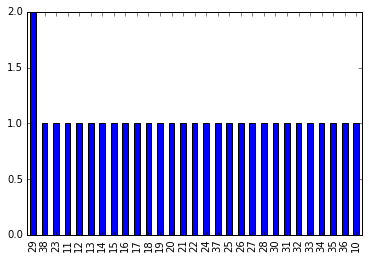

In [59]:
%pylab inline
pd.value_counts(pop.age.head(n=30)).plot(kind='bar')

# (3) Analyze Data


### Basic Statistics

Load Loyola Law School (LLS) data about students performance in GPA before and after an intervention (i.e., additional course).
Loyola Law School (LLS) wanted to help struggling students perform better in their second year. Those with first-semester GPAs below 2.75 were required to take an additional course in Spring designed to build skills. All students with low GPAs were required to take the course, and no students with higher GPAs were allowed. 
GPA stand for general point assignment. 

One might be interested in measuring if the intervention was successful (i.e., if student's GPA increased in fall of their second year).

Let's first load and explore the data.

In [60]:
%pylab inline

import codecs                     # load UTF-8 Content
import json                       # load JSON files
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting

import math                       # Transformations
import statsmodels.formula.api as smf  # For doing statistical regression
import statsmodels.api as sm      # Access to the wider statsmodels library, including R datasets
from collections import Counter   # Counter is useful for grouping and counting
import scipy


df = pd.read_csv("./data/sampledata.csv")
print ("==============================================================================")
print ("Descriptive Statistics")
print ("==============================================================================")
print (df.describe())

# ssid is a student id. Not a number. Change type!
print (df.dtypes)
df.sid = df.sid.apply(str)
print ("==============================================================================")
print ("Data Types")
print ("==============================================================================")
print (df.dtypes)


Populating the interactive namespace from numpy and matplotlib
Descriptive Statistics
               sid      pregpa  intervention   postgpa_a   postgpa_b
count   218.000000  218.000000    218.000000  218.000000  218.000000
mean   1146.729358    3.153694      0.206422   82.715596   82.912844
std      86.068642    0.470539      0.405668    6.045285    4.927747
min    1001.000000    1.977733      0.000000   62.000000   75.000000
25%    1071.500000    2.866533      0.000000   78.000000   79.000000
50%    1153.500000    3.155567      0.000000   82.000000   82.000000
75%    1219.500000    3.466567      0.000000   87.000000   87.000000
max    1293.000000    4.177933      1.000000   96.000000   94.000000
sid               int64
pregpa          float64
intervention      int64
postgpa_a         int64
postgpa_b         int64
dtype: object
Data Types
sid              object
pregpa          float64
intervention      int64
postgpa_a         int64
postgpa_b         int64
dtype: object


### Hypothesis Testing

Let's assume that we want to test if the difference between postgpa_a and postgpa_b for both groups of students (group where intervention=1 and intervention=0).
In other words, does the intervention have a significant impact on student's GPA evolution.


Different Types of Hypothesis Tests:
- Difference in Means (e.g., independent two-sample t-test, Mann-Whitney U-test )
- Difference in Pairs (paired two-sample t-test, Wilcoxon signed-rank test)
- Mean (e.g., one-sample t-test, Mann-Whitney U-test)
- Proportion (e.g., one-sample t-test)
- Difference in Proportions (e.g., Chi-square)
- Goodness of Fit (e.g. KS divergence)

Based on what hypothesis we want to test and which types of variables are involved we need to pick the right test. 
Additionally, statistical hypothesis tests can be grouped into parametric tests and non-parametric tests. Parametric tests assume that the data can be well described by a distribution that is defined by one or more parameters, in most cases by a normal distribution. 
Therefore, we need to check if our data set is in fact well approximated by the chosen distribution (in our case a normal distribution). If not, the results of the parametric test can be completely wrong. 



#### QQ plots
We therefore need to check if the differences are normal distributed (we need to check that for each group separately) and we need to inspect how the differences are distributed. 

We start with a visual inspection, here with a QQ-plot, sometimes also referred to as probplot. For a quantitative evaluation one of the many existing normality tests should then be applied.
QQ plots (“Q” stands for quantile) are a graphical method for comparing two probability distributions by plotting their quantiles against each other.A point (x,y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the (number of the) interval for the quantile.

If the two distributions being compared are similar, the points in the Q−Q plot will approximately lie on the line y=x. If the distributions are linearly related, the points in the Q−Q plot will approximately lie on a line, but not necessarily on the line y=x. R2 value exposes the goodness of fit between the quantil distribution which we observe and the diagonal line.


#### Test Normality
Beside graphical analysis we can use several tests of normality such as the D’Agostino-Pearson omnibus test stats.normaltest(x) which  combines a skewness and kurtosis test to produce a single, global, “omnibus” statistic.

Or the Lilliefors test, which is based on the Kolmogorov–Smirnov test, and quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. (The original Kolmogorov-Smirnov test should be used carefully, especially if the number of samples is ca. ≤300).

An alternative is the Shapiro-Wilk W test which can also be used with ≤50 samples, and which depends on the covariance matrix between the order statistics of the observations.

More details and examples on how to check normality in python can be found here: https://github.com/thomas-haslwanter/statsintro/blob/master/Code3/checkNormality.py




In [61]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import kstest_normal

def check_normality(data):
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data, plot=plt)
    plt.show()

    pVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['omnibus'] = stats.normaltest(data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk'] = stats.shapiro(data)
    
    # Or you can check for normality with Lilliefors-test
    ksStats, pVals['Lilliefors'] = kstest_normal(data)
    
    # Alternatively with original Kolmogorov-Smirnov test
    _, pVals['KS'] = stats.kstest((data-np.mean(data))/np.std(data,ddof=1), 'norm')
    
    print(pVals)
    if pVals['omnibus'] > 0.05:
        print('Data are normally distributed')
 
    
    


Let's check if the difference between postgpa_a and postgpa_b for each group is normally distributed! Depending on which hypothesis we want to test this might be our actual test statistic. 

We have unpaired data (since our subjects in control and treatment group are not identical) and if we want to know if the mean of postgpa_a and postgpa_b are identical we can check if the mean difference is zero.



    sid    pregpa  intervention  postgpa_a  postgpa_b  diff
0  1001  3.155467             0         87         87     0
1  1002  3.000000             0         77         77     0
2  1003  2.420000             1         78         79    -1
3  1004  2.533533             1         78         78     0
4  1005  2.422267             1         79         80    -1
Axes(0.125,0.125;0.775x0.775)


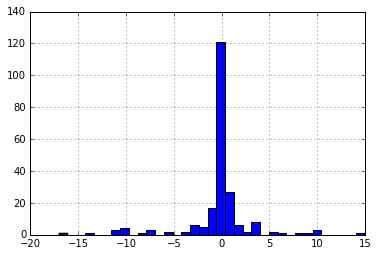

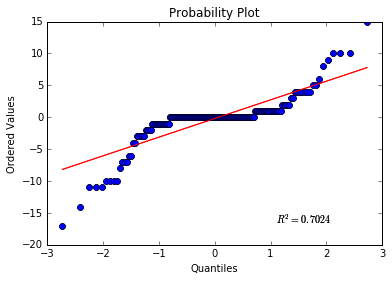

omnibus         2.356762e-14
Shapiro-Wilk    4.011358e-19
Lilliefors      7.819657e-62
KS              0.000000e+00
dtype: float64
None


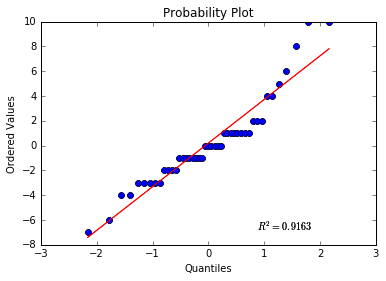

omnibus         0.007593
Shapiro-Wilk    0.004688
Lilliefors      0.000332
KS              0.069663
dtype: float64
None


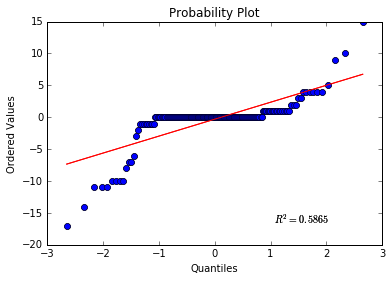

omnibus         5.298589e-17
Shapiro-Wilk    6.912233e-20
Lilliefors      5.977338e-78
KS              0.000000e+00
dtype: float64
None


In [62]:
import math

#df.postgpa_a - df.postgpa_b
diff = df['postgpa_a'].sub(df['postgpa_b'])
df["diff"] = diff

plt.figure()
print (df.head())
#print df.dtypes
#print df["diff"].hist()



#df["diff"].apply(np.log)
print (df["diff"].hist(bins=35))

plt.figure()
stats.probplot(df["diff"], plot=plt) # diff is not normal distributed
print (check_normality(df["diff"]))


df_1 = df[df.intervention==1]
stats.probplot(df_1["diff"], plot=plt) # diff is not normal distributed
print (check_normality(df_1["diff"]))

df_0 = df[df.intervention==0]
stats.probplot(df_0["diff"], plot=plt) # diff is not normal distributed
print (check_normality(df_0["diff"]))

Since this difference is not normal, we need either data transformation or non parametric tests.



Before that lets generate a normal and non-normal distribution and explore if our normality check actually works.

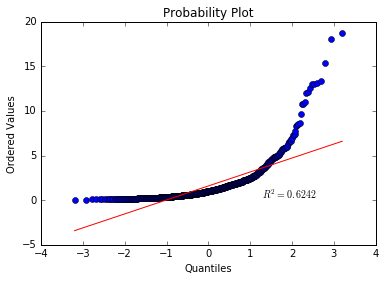

omnibus         2.580968e-183
Shapiro-Wilk     5.392196e-42
Lilliefors      4.702054e-138
KS               0.000000e+00
dtype: float64


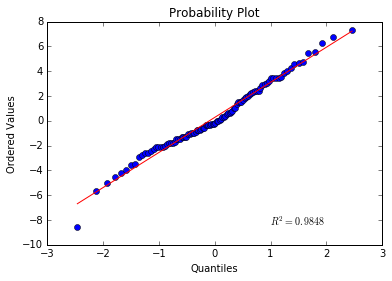

omnibus         0.610573
Shapiro-Wilk    0.463270
Lilliefors      0.187641
KS              0.646082
dtype: float64
Data are normally distributed


In [63]:
logn_data = np.random.lognormal(mean=0.0, sigma=1.0, size=1000)
check_normality(logn_data) # now we can reject the normality hypothesis.

np.random.seed(5)   
myMean=0
mySD=3
norm_data = stats.norm.rvs(myMean, mySD, size=100)
check_normality(norm_data) # now we can not reject the normality hypothesis.


Parametric hypoethsis tests (which often assume that the data is normal distributed) can be used if the normality hypothesis cannot be rejected. 

So we have 2 options now:
- Data Transformation: If your data deviate significantly from a normal distribution, it is sometimes possible to make the distribution approximately normal by transforming your data. For example, data often have values that can only be positive (e.g. the size of persons), and that have long positive tail: such data can often be made normal by applying a log transform. The transformations used should not change the relative ordering of the values but alter the distance between successively ordered values to change the overall shape of the distribution. Tukeys ladder of transformations gives several common transformations to correct skew in each direction. For example, squaring or cubing corrects downward skew (right side skews). Upward skewing (left side skews) as they appear in lognormal distributions can be corrected by taking the logarithms (or logs).
- Non-parametric Tests





### Differences in Groups (Two-sampled t-tests)
Paired samples t-tests typically consist of a sample of matched pairs of similar units, or one group of units that has been tested twice (a "repeated measures" t-test). A typical example of the repeated measures t-test would be where subjects are tested prior to a treatment, say for high blood pressure, and the same subjects are tested again after treatment with a blood-pressure lowering medication

Unpaired samples are independent samples.
In our example, we have assigend students to the intervention-group and the the control-group. These 2 groups are independent. 

To assess the effect of the intervention we want to compare the change in the treatment group with the change in the control group.
We can use an unpaired t-test (if the change is normal distributed) or an nonparametric alternative (e.g. the Mann-Whitney test compares the medians rather than means or the Kolmogorov-Smirnov test compares the shapes of the distributions).

However, first we will try to transform our data to make it normally distributed (though looking at the data tells us that it will not work).

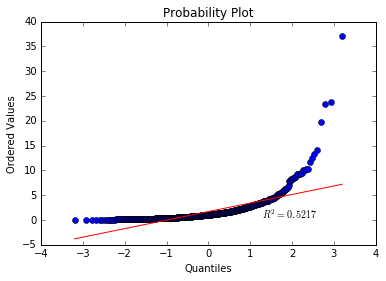

omnibus         1.220168e-273
Shapiro-Wilk     1.401298e-45
Lilliefors      1.320713e-167
KS               0.000000e+00
dtype: float64


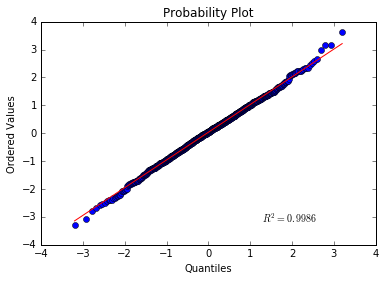

omnibus         0.389402
Shapiro-Wilk    0.729851
Lilliefors      0.734130
KS              0.952766
dtype: float64
Data are normally distributed


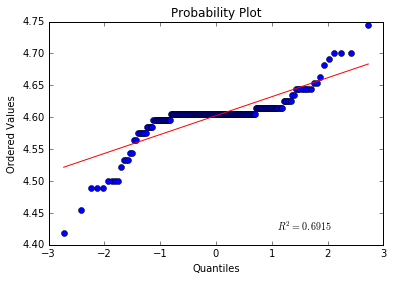

omnibus         8.915349e-19
Shapiro-Wilk    1.832968e-19
Lilliefors      1.797791e-64
KS              0.000000e+00
dtype: float64


In [64]:
# Example of how we can transform data to make them normal
logn_data = np.random.lognormal(mean=0.0, sigma=1.0, size=1000)
check_normality(logn_data) # now we can reject the normality hypothesis.

# we can transform the lognormal data and they should become normal
check_normality(np.log(logn_data)) # now we cannot reject the normality hypothesis.

# The difference cannot be tranformed into a normal distributed
check_normality(np.log(df["diff"].add(100))) # we add a constant to avoid log of 0





So we need to go for the non-parametric Test:

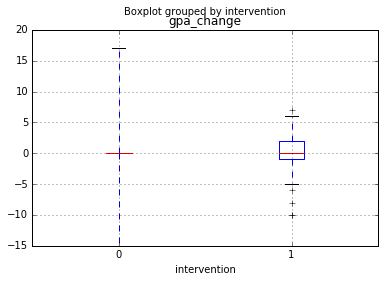

Medians:
0.0
0.0
Means:
-0.300578034682
0.2
95% CI for Mean:
(-7.0117539462551921, 6.4105978768910301)
(-6.7215070455526016, 7.1215070455526019)
(-0.30057803468208094, -0.28418216262449275, -0.31697390673966913)
(0.20000000000000001, 0.23357514423119707, 0.16642485576880295)
mannwhitneyu results:
MannwhitneyuResult(statistic=3671.0, pvalue=0.51898153374771794)
1.64638034543
-0.0787017068246
-0.062722518279


In [83]:

df["gpa_change"] = df["postgpa_b"] - df["postgpa_a"]
df.boxplot("gpa_change", "intervention")
plt.show()

diff_1 = df.postgpa_a[df.intervention==1].sub(df.postgpa_b[df.intervention==1])
diff_0 = df.postgpa_a[df.intervention==0].sub(df.postgpa_b[df.intervention==0])

print("Medians:")
print (np.median(diff_0))
print (np.median(diff_1))
print ("Means:")
print (np.mean(diff_0))
print (np.mean(diff_1))
print ("95% CI for Mean:")
ci_mean_diff_0 = stats.norm.interval(0.95, loc=np.mean(diff_0), scale=np.std(diff_0))
ci_mean_diff_1 = stats.norm.interval(0.95, loc=np.mean(diff_1), scale=np.std(diff_1))
print (ci_mean_diff_0)
print (ci_mean_diff_1)



def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    #h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    h = se * scipy.stats.t._ppf((confidence)/2., n-1)
    return m, m-h, m+h


print (mean_confidence_interval(diff_0))
print (mean_confidence_interval(diff_1))


print ("mannwhitneyu results:")
print (scipy.stats.mannwhitneyu(diff_1, diff_0))


print (stats.t.ppf(1-0.05, 999))
print (stats.t.ppf(0.475, 1))
print (stats.t.ppf(0.475, 1000))


We cannot reject the null hypothesis which says that the 2 groups are identical. So maybe they are identical and the treatment had no effect.



Maybe we need to focus only at individuals near the threshold. Those students are very similar but some of them where treated and others not. Here we should see a clear difference if the treatment had an effect.

In [66]:

sub_df  = df[df['pregpa'] > 2.6] 
sub_df  = sub_df[sub_df['pregpa'] < 2.9]
print (sub_df.shape)

sub_diff_1 = sub_df.postgpa_a[sub_df.intervention==1].sub(sub_df.postgpa_b[sub_df.intervention==1])
sub_diff_0 = sub_df.postgpa_a[sub_df.intervention==0].sub(sub_df.postgpa_b[sub_df.intervention==0])



print (scipy.stats.mannwhitneyu(sub_diff_1, sub_diff_0))

(30, 7)
MannwhitneyuResult(statistic=119.0, pvalue=0.80052867635428371)


We can see no significan difference between the 2 groups.




### Mean (One-sampled t-tests, Mann-Whitney U test)
Let's assume we have an hypothesis about the mean of postgpa_a and we want to test it.
The hypothesis is that the mean is greater or equal 80. 
Our null hypothesis is that the mean is smaller or equal 80.

We can use a one-sample t-test if postgpa_a is normal distributed (which it is as we have seen before, but lets check again). A non-parametric alternative would be the Mann-Whitney U.


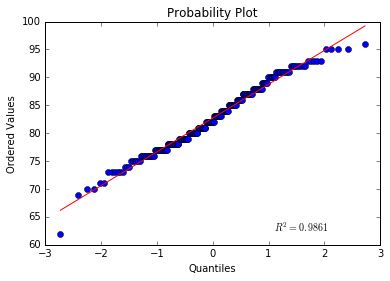

omnibus         0.624353
Shapiro-Wilk    0.027142
Lilliefors      0.016389
KS              0.256761
dtype: float64
Data are normally distributed
count    218.000000
mean      82.715596
std        6.045285
min       62.000000
25%       78.000000
50%       82.000000
75%       87.000000
max       96.000000
Name: postgpa_a, dtype: float64
Ttest_1sampResult(statistic=6.6324912332431563, pvalue=2.5867729072353664e-10)


In [67]:
check_normality(df.postgpa_a)
print (df.postgpa_a.describe())
# two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a 
# is equal to the given population mean, popmean.
print (scipy.stats.ttest_1samp(df.postgpa_a, 80.0))

We get the p and t values from a two-tailed (or two-sided) test! 
The t-value measures the size of the difference between observed and expected values relative to the variation in your sample data. The t-value is simply the calculated difference represented in units of standard error. t > 0: observed was greater than expected. t < 0: observed value was smaller than expected. 

The p-value indicates if  it is unlikely that we observed it by chance.

In this example, we must reject the null hypothesis (which states equality) of a greater-than test because p/2 < alpha and t > 0.

Our results suggest that we can reject the null hypothesis which states that the mean is smaller or equal 80.


Usually if we want to test the null hypothesis that states that the mean is equal or smaller 80, we would conduct a one-tailed t-test. In R we can specify which tail we want to look at: wilcox.test(x, y, alternative = 'greater')
In scipy that's not possible at the moment.



### z-test versus t-test

- Z-test is a statistical hypothesis test that follows a normal distribution while T-test follows a Student’s T-distribution.
- A T-test is appropriate when you are handling small samples (n < 30) while a Z-test is appropriate when you are handling moderate to large samples (n > 30).
- Z-tests are preferred than T-tests when standard deviations are known. If you have a very large random sample you can assume that the sample standard deviation is the same as the population standard deviation.

If you had an infinite number of samples t and z would be the same anyway



### Categorical Variables / Proportion Tests (Chi-Square Test,  Two-proportion z-test)

Two-proportion z-test is used to determine whether the difference between two proportions is significant.


Chi-square test of homogeneity  is applied to a single categorical variable from two different populations. It is used to determine whether frequency counts are distributed identically across different populations.

Assumption of the Chi-Square Test:
-  Each observation must be INDEPENDENT – one data point per subject
-  Dependent Variable is categorical (often yes/no)
-  Calculations must be made from COUNTS, not proportions or percentages
-  No cell should have an “expected value” of less than 5 

The chi-Squared test compares the observed frequencies in each category of a contingency table with the expected frequencies. It is used to determine whether the deviations between the observed and the expected counts are too large to be attributed to chance. Departure from independence is easily checked by inspecting residuals.

A chi-square test for equality of two proportions is exactly the same thing as a z-test. 


#### Example:
Time magazine reported the result of a telephone poll of 800 adult Americans. The question posed of the Americans who were surveyed was: "Should the federal tax on cigarettes be raised to pay for health care reform?" The results of the survey were:

Results: 351 out of 605 non-smokers said yes. 41 out of 195 smokers said yes.
source: https://onlinecourses.science.psu.edu/stat414/node/268

Is there sufficient evidence at the α = 0.05 level, say, to conclude that the two populations — smokers and non-smokers — differ significantly with respect to their opinions?

H0: p1 = p2
H1: p1 != p2


In [68]:
import statsmodels
print (statsmodels.stats.proportion.proportions_chisquare([351, 41], [605, 195]))



# should give the same result but throws an error
#print statsmodels.stats.proportion.proportions_ztest([351, 41], [605, 195])

(80.746415964139416, 2.5662304464803294e-19, (array([[351, 254],
       [ 41, 154]]), array([[ 296.45,  308.55],
       [  95.55,   99.45]])))


We can reject the null-hypothesis which stated that the populations do not differ in their opinion.

#### Example:
A survey claims that 9 out of 10 doctors recommend aspirin for their patients with headaches. To test this claim, a random sample of 100 doctors is obtained. Of these 100 doctors, 82 indicate that they recommend aspirin. 

Was the survey claim (90% of doctors recommend aspirin) accurate? Use alpha = 0.05

H0: p = 0.9
H1: p != 0.9

In [69]:
# expected frequencies (if h0 would be true): 90 out of 100 should recommend it 
# observed frequencies: 82 out of 100 recommend it

print (statsmodels.stats.proportion.proportions_chisquare([82], [100], 0.9))
print (scipy.stats.chisquare(f_obs=[82, 18], f_exp=[90, 10]))


(7.1111111111111152, 0.0076607611351794608, (array([[82, 18]]), array([[ 90.,  10.]])))
Power_divergenceResult(statistic=7.1111111111111116, pvalue=0.0076607611351794573)


At the significance level 0.05 we can reject H0 --> therefore we can conclude that the survey claim was inaccurate.

### Distribution fitting and goodness of fit
is used to determine whether sample data are consistent with a hypothesized distribution.

D-value + p-value: Lower p-values reject the hypo that they are drawn from the same distribution!
gamma log likelihood -701.198145322
gamma ks test KstestResult(statistic=0.065310842116835854, pvalue=0.29818086114191411)
beta log likelihood -700.123521818
beta ks test KstestResult(statistic=0.071345863618731187, pvalue=0.20720290731334767)
rayleigh log likelihood -759.924773783
rayleigh ks test KstestResult(statistic=0.24916888141653173, pvalue=2.071010030135767e-12)
norm log likelihood -701.070188709
norm ks test KstestResult(statistic=0.068227739080709282, pvalue=0.25107571092673564)
pareto log likelihood -906.706034101
pareto ks test KstestResult(statistic=0.41768283115583127, pvalue=0.0)


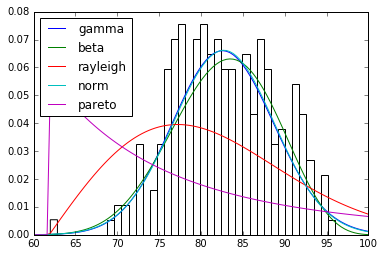

In [70]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as st

data = df.postgpa_a.tolist()
h = plt.hist(data, bins=40, normed=True, color='w')

dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']
#dist_names = ['norm']
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#print x

print ("D-value + p-value: Lower p-values reject the hypo that they are drawn from the same distribution!")

logpdfs = {}

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data)
    logpdf = dist.logpdf(data, *param[:-2], loc=param[-2], scale=param[-1])
    logpdfs[dist_name] = logpdf
    print (dist_name, "log likelihood", logpdf.sum())
    print  (dist_name, "ks test", st.kstest(data, dist.cdf, param))
    #pdf_fitted = dist.pdf(x, param[0], param[1])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) 
    plt.plot(x, pdf_fitted, label=dist_name)
    #plt.xlim(0,47)
plt.legend(loc='upper left')
plt.show()

Manual inspection shows us that the gamma, normal and beta distributions seems to be good fit.

KS-test: the null distribution of this statistic is calculated under the null hypothesis that the samples are drawn from the same distribution 

However, beware that there are some problems with applying a KS-statistic on MLE determined parameters since the KS-statistic assumes that the model should be derived from another dataset. However, it gives an initial idea of the goodness of fit. More rigorously, one would apply bootstrapping!

Thus, we further resort to the likelihood ratio test. To start with, a higher likelihood corresponds to a better fit. We can see that the gamma, normal and beta distributions have similar likelihoods. To further judge the differences, we need to apply likelihood ratio tests.

Likelihood ratio test as proposed in http://arxiv.org/pdf/0706.1062v2.pdf and implemented in https://github.com/jeffalstott/powerlaw/. 

Returns
    -------
    R : float
        The loglikelihood ratio of the two sets of likelihoods. If positive, 
        the first set of likelihoods is more likely (and so the probability
        distribution that produced them is a better fit to the data). If
        negative, the reverse is true.
    p : float
        The significance of the sign of R. If below a critical values
        (typically .05) the sign of R is taken to be significant. If above the
        critical value the sign of R is taken to be due to statistical
        fluctuations.

In [71]:
from powerlaw import *

#
print ("gamma vs. norm")
print (loglikelihood_ratio(logpdfs['gamma'], logpdfs['norm']))
print ("""The normal distribution fit exhibits a higher likelihood. However, the p-value is way above 0.1 
indicating no statistically significant differences""")

print ()
print ("-----")
print ()

print ("gamma vs. beta")
print (loglikelihood_ratio(logpdfs['gamma'], logpdfs['beta']))
print ("""The beta distribution fit exhibits a higher likelihood. However, the p-value is way above 0.1 indicating 
no statistically significant differences""")

print ()
print ("-----")
print ()

print ("norm vs. beta")
print (loglikelihood_ratio(logpdfs['norm'], logpdfs['beta']))
print ("""The beta distribution fit exhibits a higher likelihood. However, the p-value is way above 0.1 indicating 
no statistically significant differences""")

print ()
print ("-----")
print ("For sanity reasons we also compare the pareto with the beta fit")
print ()

print ("pareto vs. beta")
print (loglikelihood_ratio(logpdfs['pareto'], logpdfs['beta']))
print (""" The beta distribution fit exhibits a much higher likelihood. 
       Also, now the p-value is way below 0.05 indicating that this difference is significant and 
       the beta distribution is a better fit to the data compared to the pareto distribution""")





gamma vs. norm
(-0.12795661370789002, 0.65518780705785162)
The normal distribution fit exhibits a higher likelihood. However, the p-value is way above 0.1 
indicating no statistically significant differences

-----

gamma vs. beta
(-1.0746235040223437, 0.42139122136199803)
The beta distribution fit exhibits a higher likelihood. However, the p-value is way above 0.1 indicating 
no statistically significant differences

-----

norm vs. beta
(-0.94666689031445372, 0.44225535986015385)
The beta distribution fit exhibits a higher likelihood. However, the p-value is way above 0.1 indicating 
no statistically significant differences

-----
For sanity reasons we also compare the pareto with the beta fit

pareto vs. beta
(-206.58251228224927, 1.078167972057423e-76)
 The beta distribution fit exhibits a much higher likelihood. 
       Also, now the p-value is way below 0.05 indicating that this difference is significant and 
       the beta distribution is a better fit to the data compared to th

### Relation between continous Variables

- Correlation Analysis
- Regression

#### Correlation
The correlation coefficient between two variables answers the question: “Are the two variables related? Different correlation coefficients exists (e.g., Pearson, Spearman, Kendall, gamma). 
If many ties are present you should use Kendall or gamma. If your data is not interval scale you should use spearman rank correlation which also works for ordinal data. If you data is interval scale and and has no ties you may use Pearson.
Pearson benchmarks linear relationship, Spearman benchmarks monotonic relationship.


Let's assume we are interested in the relation between postgpa_a and postgpa_b.


In [72]:
print ("pearson")
print (df.corr(method='pearson'))
print ("spearman")
print (df.corr(method='spearman'))
print ("kendall")
print (df.corr(method='kendall'))

print ("spearman + p-value")
print (scipy.stats.spearmanr(df['postgpa_a'], df['postgpa_b']))
print ("kendall + p-value")
print (scipy.stats.kendalltau(df['postgpa_a'], df['postgpa_b']))

pearson
                pregpa  intervention  postgpa_a  postgpa_b      diff  \
pregpa        1.000000     -0.737864   0.564496   0.656957  0.050635   
intervention -0.737864      1.000000  -0.289762  -0.396685  0.058683   
postgpa_a     0.564496     -0.289762   1.000000   0.819973  0.579306   
postgpa_b     0.656957     -0.396685   0.819973   1.000000  0.008446   
diff          0.050635      0.058683   0.579306   0.008446  1.000000   
gpa_change   -0.050635     -0.058683  -0.579306  -0.008446 -1.000000   

              gpa_change  
pregpa         -0.050635  
intervention   -0.058683  
postgpa_a      -0.579306  
postgpa_b      -0.008446  
diff           -1.000000  
gpa_change      1.000000  
spearman
                pregpa  intervention  postgpa_a  postgpa_b      diff  \
pregpa        1.000000     -0.701044   0.572612   0.667868  0.018689   
intervention -0.701044      1.000000  -0.323955  -0.414132 -0.043879   
postgpa_a     0.572612     -0.323955   1.000000   0.830330  0.418222   
p

There is a pretty strong and significant relationship between the 2 vars.



####Regression
We can use the method of regression when we want to predict the value of one variable from the other. We can also use regression if we want to hold 1-n variables fixed and only measure the predictive power of one single variable. 


Residuals are the differences between observed values and predicted values. To estimate the quality of our regression model we can use the squared sum of the residuals. But obviously this would depend on how many observations we make and also on how much variation we need to explain. Therefore, usually measures like R2 are used which relate the average squared sum of residuals to the total variance that we need to explain.

Lets say we want to predict postgpa_b by using postgpa_a.

In [73]:
import numpy as np
import statsmodels.api as sm



# Fit regression model
results = sm.OLS(df.postgpa_a, df.postgpa_b).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              postgpa_a   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.250e+05
Date:                Mon, 04 Apr 2016   Prob (F-statistic):          1.40e-301
Time:                        09:36:15   Log-Likelihood:                -579.46
No. Observations:                 218   AIC:                             1161.
Df Residuals:                     217   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
postgpa_b      0.9977      0.003    353.543      0.0

The coefficients or weights of the linear regression reveal the predictive power of the predictor variable for the response variable.

We use the t-test to test the null hypothesis that the coefficient of a given predictor variable is zero, implying that a given predictor has no appreciable effect on the response variable. The alternative hypothesis is that the predictor does contribute to the response.

The confidence interval is built using the standard error, the p-value from our T-test, and a critical value from a T-test having N−k degrees of freedom, where k is the number of observations and P is the number of model parameters, i.e., the number of predictor variables. The confidence interval is the range of values we would expect to find the parameter of interest, based on what we have observed. A smaller confidence interval suggests that we are confident about the value of the estimated coefficient.



The condition number measures the sensitivity of a function’s output to its input. When two predictor variables are highly correlated, which is called multicollinearity, the coefficients or factors of those predictor variables can fluctuate erratically for small changes in the data. If the condition number is greater than 30, then the regression may have multicollinearity. One approach to this problem in regression is the technique of ridge regression, which is available in the sklearn Python module.


### Power of a Hypothesis Test
The probability of not committing a Type II error is called the power of a hypothesis test.

In each test we have 4 dependent factors:

- Power of test
- Sample size 
- Significance level 
- The "true" value of the parameter being tested. The greater the effect size, the greater the power of the test.

Scipy allows to estimate one the 4 factors while holding the other 3 fixed.


In [74]:
from statsmodels.stats import power
print(power.tt_ind_solve_power(effect_size = 0.5, alpha =0.05, power=0.8))
# Result: 63.77


effect_size = power.tt_ind_solve_power(alpha =0.05, power=0.8, nobs1=25)
# Result: 0.81

63.76561177540974



The result tells us if we compare two groups with the same number of subjects and the same standard deviation, require an α=0.05 a test power of 80% (which means the chance of correctly accepting the alternate hypothesis is 80%), and we want to detect a difference between the groups that is half the standard deviation, we need to test 64 subjects.


In the second example we see that if we have an α=0.05, a test power of 80%, and 25 subjects in each group, then the smallest difference between the groups is 81% of the sample standard deviation.